# Exploring Dandiset 001174: Calcium imaging in SMA and M1 of macaques

**Version:** 0.250331.2218

---
*Disclaimer: This notebook was AI-generated to facilitate exploration of the Dandiset. It has not been fully verified by human experts. Please exercise caution when interpreting the code, results, and any conclusions drawn. Always cross-reference with official documentation and publications.*
---

## Overview of the Dandiset

This Dandiset, titled **"Calcium imaging in SMA and M1 of macaques"**, focuses on the study of motor cortices in non-human primates using calcium imaging and miniature microscopes.

**Dandiset Link:** [https://dandiarchive.org/dandiset/001174/0.250331.2218](https://dandiarchive.org/dandiset/001174/0.250331.2218)

**Description from the DANDI Archive:**
> The study of motor cortices in non-human primates is relevant to our understanding of human motor control, both in healthy conditions and in movement disorders. Calcium imaging and miniature microscopes allow the study of multiple genetically identified neurons with excellent spatial resolution. We used this method to examine activity patterns of projection neurons in deep layers of the supplementary motor (SMA) and primary motor areas (M1) in four rhesus macaques. We implanted gradient index lenses and expressed GCaMP6f to image calcium transients while the animals were at rest or engaged in an arm reaching task. We tracked the activity of SMA and M1 neurons across conditions, examined cell pairs for synchronous activity, and assessed whether SMA and M1 neuronal activation followed specific sequential activation patterns. We demonstrate the value of in vivo calcium imaging for studying patterns of activity in groups of corticofugal neurons in SMA and M1.

**Key techniques and variables:** One-photon calcium imaging, GCaMP6f, microendoscopes, reaching task, neuronal activity in SMA and M1. Variables measured include `ProcessingModule`, `PlaneSegmentation`, `OpticalChannel`, `ImagingPlane`, `OnePhotonSeries`.

## Notebook Goals

This notebook aims to guide users through:
1. Connecting to the DANDI archive and accessing metadata for Dandiset 001174.
2. Listing assets within the Dandiset.
3. Loading a specific NWB (Neurodata Without Borders) file from this Dandiset.
4. Exploring the basic structure and metadata of the loaded NWB file.
5. Visualizing key data components, such as:
    - A raw imaging frame from a `OnePhotonSeries`.
    - Fluorescence traces from identified Regions of Interest (ROIs).
    - Spatial footprints (image masks) of these ROIs.

The goal is to provide a starting point for researchers to understand how to access and begin analyzing the data in this Dandiset.

## Required Packages

To run this notebook, you will need the following Python packages installed. We assume these are already available in your environment.

- `dandi` (for interacting with the DANDI Archive API)
- `pynwb` (for reading NWB files)
- `h5py` (for low-level HDF5 file access, used by `pynwb` and `remfile`)
- `remfile` (for streaming remote HDF5 files)
- `numpy` (for numerical operations)
- `matplotlib` (for plotting)
- `seaborn` (for enhanced plot styling)

No installation commands are included in this notebook.

## 1. Connecting to DANDI and Accessing Dandiset Information

In [1]:
# Import necessary libraries for DANDI interaction
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "001174"
dandiset_version = "0.250331.2218"
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata.get('name', 'N/A')}")
print(f"Dandiset identifier: {metadata.get('identifier', 'N/A')}/{metadata.get('version', 'N/A')}")
print(f"Dandiset URL: {dandiset.api_url}") # metadata['url'] may not be populated fully for specific version

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier}, Size: {asset.size} bytes)")

Dandiset name: Calcium imaging in SMA and M1 of macaques
Dandiset identifier: DANDI:001174/0.250331.2218
Dandiset URL: https://api.dandiarchive.org/api/dandisets/001174/

First 5 assets:
- sub-V/sub-V_ses-20230309T110929_ophys.nwb (ID: a2b04c7f-f671-4a55-ac36-5df4d842dfc2, Size: 10659709412 bytes)
- sub-Q/sub-Q_ophys.nwb (ID: de07db56-e7f3-4809-9972-755c51598e8d, Size: 790140856 bytes)
- sub-Q/sub-Q_ses-20220922T131747_ophys.nwb (ID: ac161d0e-7642-48bd-9bef-8eff59319d48, Size: 787845832 bytes)
- sub-Q/sub-Q_ses-20221003T131952_ophys.nwb (ID: 9c3678d5-22c3-402c-8cd4-6bc38c4d61e3, Size: 1695928224 bytes)
- sub-Q/sub-Q_ses-20221028T121142_ophys.nwb (ID: b4e6bbf7-0564-4628-b8f0-680fd9b8d4ea, Size: 1557206224 bytes)


## 2. Loading a Specific NWB File

We will now load one of the NWB files from the Dandiset. For this demonstration, we've chosen a relatively small file: `sub-Q/sub-Q_ophys.nwb`.

The path of the file is `sub-Q/sub-Q_ophys.nwb`.
Its asset ID is `de07db56-e7f3-4809-9972-755c51598e8d`.

The URL to download/access this asset via the DANDI API is constructed as:
`https://api.dandiarchive.org/api/assets/<ASSET_ID>/download/`

So, for our chosen file, the URL is:
`https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/`

In [2]:
# Import libraries for NWB file loading and plotting
import pynwb
import h5py
import remfile # For streaming data from remote NWB files
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a general plot theme using seaborn
sns.set_theme()

# NWB file URL (hard-coded based on prior selection for this example notebook)
nwb_file_url = "https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/"
asset_id = "de07db56-e7f3-4809-9972-755c51598e8d" # From the assets list / user choice

print(f"Attempting to load NWB file from URL: {nwb_file_url}")

# Load the NWB file using remfile for streaming
# We use a try/finally block to ensure the remote file object is closed.
remote_f = None
nwbfile = None
io_obj = None

try:
    remote_f = remfile.File(nwb_file_url)
    # pynwb.NWBHDF5IO typically handles h5_file closure if it opens it.
    # If passing an already open h5_file, ensure it's managed correctly.
    # Using h5py.File as a context manager is good practice if NWBHDF5IO doesn't.
    # For clarity here: NWBHDF5IO can manage the h5py.File it's given.
    h5_f = h5py.File(remote_f, 'r') # NWBHDF5IO will manage this h5_f
    io_obj = pynwb.NWBHDF5IO(file=h5_f, mode='r', load_namespaces=True)
    nwbfile = io_obj.read()
    print("NWB file loaded successfully.")
    
    # Display some basic metadata from the NWB file
    print(f"\nNWB File Identifier: {nwbfile.identifier}")
    print(f"Session Description: {nwbfile.session_description}")
    print(f"Session Start Time: {nwbfile.session_start_time}")
    if nwbfile.subject:
        print(f"Subject ID: {nwbfile.subject.subject_id}")
        print(f"Subject Species: {nwbfile.subject.species}")
except Exception as e:
    print(f"Error loading NWB file: {e}")
    # If nwbfile is None, subsequent cells requiring it might fail or need to be skipped.

Attempting to load NWB file from URL: https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/


NWB file loaded successfully.

NWB File Identifier: 5c2c4bb2-8310-4e0e-ae01-fd872edba928
Session Description: Calcium imaging in SMA during the spontaneous condition
Session Start Time: 2022-09-15 13:16:33.129000+00:00
Subject ID: Q
Subject Species: Macaca mulatta


### Explore this NWB file on Neurosift

You can also explore this specific NWB file interactively using Neurosift:
[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/&dandisetId=001174&dandisetVersion=draft](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/&dandisetId=001174&dandisetVersion=draft)

## 3. Summary of the NWB File Contents

Let's summarize the main data groups found in this NWB file (`sub-Q/sub-Q_ophys.nwb`):

*(Note: This summary is based on programmatic introspection of the file. The exact contents might vary for other files in the Dandiset.)*

- **Identifier:** `5c2c4bb2-8310-4e0e-ae01-fd872edba928`
- **Session Description:** `Calcium imaging in SMA during the spontaneous condition`
- **Session Start Time:** `2022-09-15T13:16:33.129000+00:00`

- **Subject Information:**
    - ID: `Q`
    - Species: `Macaca mulatta`
    - Age: `P5Y`

- **Acquisition Data (`nwbfile.acquisition`):**
    - `OnePhotonSeries`: Contains the raw imaging data.
        - Description: `Miniscope imaging data`
        - Data shape: `(6041, 320, 200)` (frames, height, width), dtype `uint16`
        - Imaging rate: ~10.01 Hz
        - Unit: `fluorescence`
        - Imaging Plane (`ImagingPlane`): Details about the optical setup used for this series.
            - Excitation Lambda: 475.0 nm
            - Device: `NVista3` (Inscopix, Inc.)

- **Processing Data (`nwbfile.processing['ophys']`):**
    - This module, typically named 'ophys', contains optical physiology data derived from raw imaging.
    - `ImageSegmentation`: Contains information about segmented Regions of Interest (ROIs).
        - `PlaneSegmentation`: Defines the spatial footprints of individual cells.
            - Description: `Footprints of individual cells obtained by segmenting the field of view`
            - `image_mask`: A table/vector data containing 2D image masks for each ROI (40 ROIs in this file). Each mask defines the shape of a cell.
    - `Fluorescence`: Contains fluorescence traces for the ROIs.
        - `RoiResponseSeries`: Time series data of fluorescence for each ROI.
            - Description: `Fluorescence data associated with spatial footprints`
            - Data shape: `(6041, 40)` (timepoints, ROIs), dtype `float32`
            - Rate: ~10.01 Hz
            - `rois`: A dynamic table region linking these traces back to the `PlaneSegmentation`.
    - `EventAmplitude`: Contains amplitude of detected neural events.
        - `RoiResponseSeries` (named "EventAmplitude" here): Time series of event amplitudes.
            - Description: `Amplitude of neural events associated with spatial footprints`
            - Data shape: `(6041, 40)` (timepoints, ROIs), dtype `float64`
            - Rate: ~10.013 Hz

- **Devices (`nwbfile.devices`):**
    - `Miniscope`: Information about the imaging device (`NVista3`, Inscopix, Inc.).

- **Imaging Planes (`nwbfile.imaging_planes`):**
    - `ImagingPlane`: Detailed configuration of the imaging plane.

*This structure is typical for calcium imaging experiments in NWB format. Other files might have different processing modules or additional data types.*

## 4. Visualizing Data from the NWB File

Now, let's visualize some of the data we've identified. We'll focus on:
1. A raw frame from the `OnePhotonSeries`.
2. Fluorescence traces for a few ROIs from `Fluorescence/RoiResponseSeries`.
3. Image masks (spatial footprints) of ROIs from `ImageSegmentation/PlaneSegmentation`.

### 4.1. Raw Imaging Frame (OnePhotonSeries)

Let's look at a single frame from the raw `OnePhotonSeries` data. This gives an idea of the field of view recorded by the miniscope. We'll pick a frame from the middle of the recording.

OnePhotonSeries data shape: (6041, 320, 200)
OnePhotonSeries data type: uint16


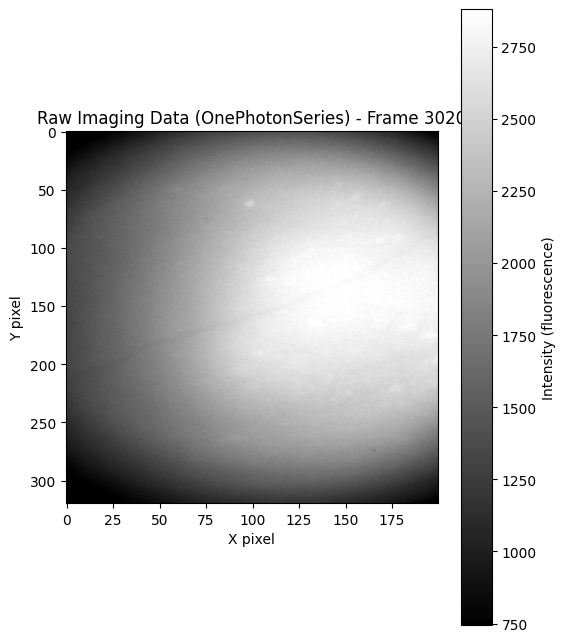

In [3]:
if nwbfile and "OnePhotonSeries" in nwbfile.acquisition:
    one_photon_series = nwbfile.acquisition["OnePhotonSeries"]
    
    print(f"OnePhotonSeries data shape: {one_photon_series.data.shape}")
    print(f"OnePhotonSeries data type: {one_photon_series.data.dtype}")

    if one_photon_series.data.shape[0] > 0:
        # Select a middle frame
        frame_index = one_photon_series.data.shape[0] // 2
        # Load only the selected frame into memory
        frame_data = one_photon_series.data[frame_index, :, :] 
        
        # Adjust contrast by clipping to percentiles
        vmin = np.percentile(frame_data, 1)
        vmax = np.percentile(frame_data, 99)

        # Plotting
        plt.style.use('default') # Use default style for cleaner image plot
        plt.figure(figsize=(6, 8)) # Adjusted for potential aspect ratio
        # Determine aspect ratio from data shape (height, width)
        # Matplotlib imshow: extent (left, right, bottom, top)
        # Data shape is (height, width) for imshow typically
        img_height, img_width = frame_data.shape
        plt.imshow(frame_data, cmap='gray', aspect=img_width/img_height if img_height > 0 else 'auto', vmin=vmin, vmax=vmax)
        plt.title(f"Raw Imaging Data (OnePhotonSeries) - Frame {frame_index}")
        plt.xlabel("X pixel")
        plt.ylabel("Y pixel")
        plt.colorbar(label=f"Intensity ({one_photon_series.unit})")
        plt.show()
    else:
        print("OnePhotonSeries data is empty or has no frames.")
else:
    print("NWB file not loaded or OnePhotonSeries not found in acquisition.")

The image above shows a single, unprocessed frame from the calcium imaging recording. You might observe general fluorescence levels, and potentially some brighter spots that could correspond to active neurons, though these are usually much clearer after processing (segmentation and trace extraction). Mottling or uneven illumination (vignetting) is also common in raw miniscope data.

### 4.2. Fluorescence Traces (RoiResponseSeries)

Next, we'll plot the fluorescence traces for a few ROIs. These traces represent the change in fluorescence intensity over time for individual, segmented neurons, which is indicative of their neural activity.

*Note: The following cell loads all fluorescence traces for all ROIs into memory. For NWB files with very long recordings or many ROIs, this could consume significant memory. In such cases, consider loading only a subset of time points or ROIs (e.g., `roi_response_series.data[:10000, :5]` to load the first 10000 timepoints for the first 5 ROIs).*

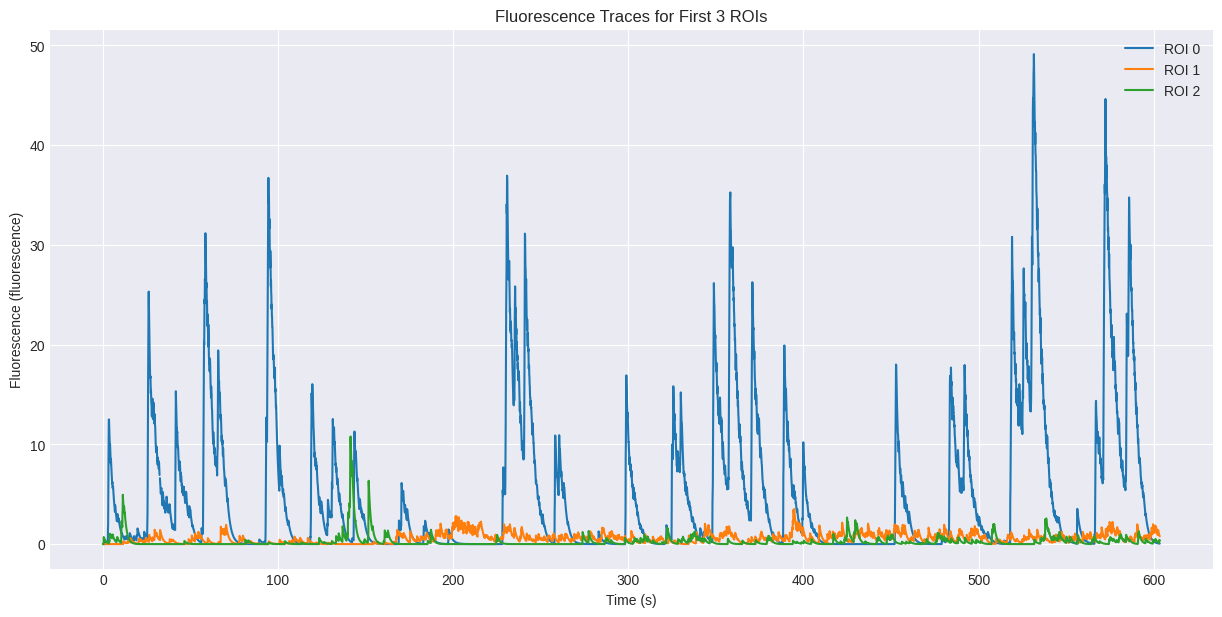

In [4]:
if nwbfile and \
   'ophys' in nwbfile.processing and \
   'Fluorescence' in nwbfile.processing['ophys'].data_interfaces and \
   'RoiResponseSeries' in nwbfile.processing['ophys'].get_data_interface('Fluorescence').roi_response_series:
    
    fluorescence_interface = nwbfile.processing['ophys'].get_data_interface('Fluorescence')
    roi_response_series = fluorescence_interface.get_roi_response_series('RoiResponseSeries')

    # Load all fluorescence data into memory: (num_frames, num_rois)
    # For very large datasets, or if memory is a concern, load only a subset, e.g.:
    # fluorescence_data = roi_response_series.data[:10000, :5] # First 10k timepoints for first 5 ROIs
    fluorescence_data = roi_response_series.data[:] 
    
    sampling_rate = roi_response_series.rate
    num_frames = fluorescence_data.shape[0]
    num_rois_total = fluorescence_data.shape[1]

    # Generate timestamps
    timestamps = np.arange(num_frames) / sampling_rate

    # Select a few ROIs to plot (e.g., first 3 or a random subset if many)
    num_rois_to_plot = min(3, num_rois_total)
    
    if num_rois_to_plot > 0:
        # Get ROI IDs for labeling
        # These IDs come from the 'rois' DynamicTableRegion which points to PlaneSegmentation table
        roi_ids = roi_response_series.rois.table.id[:] # Load all ROI IDs

        plt.style.use('seaborn-v0_8-darkgrid') # Use a seaborn style
        # sns.set_theme() # Simpler way if not picky about specific old style
        plt.figure(figsize=(15, 7))
        
        for i in range(num_rois_to_plot):
            roi_id_label = roi_ids[i] # Get actual ID for the legend
            plt.plot(timestamps, fluorescence_data[:, i], label=f"ROI {roi_id_label}")
        
        plt.xlabel("Time (s)")
        plt.ylabel(f"Fluorescence ({roi_response_series.unit})")
        plt.title(f"Fluorescence Traces for First {num_rois_to_plot} ROIs")
        plt.legend()
        plt.show()
    else:
        print("No ROIs found in RoiResponseSeries to plot.")
else:
    print("NWB file not loaded or required ophys data (Fluorescence/RoiResponseSeries) not found.")

These plots show the fluorescent activity of a few selected neurons over the course of the recording. Peaks in these traces generally correspond to calcium transients, which are proxies for neuronal firing. Different neurons will exhibit different activity patterns. The `EventAmplitude` series, found alongside `Fluorescence` data in the `ophys` processing module, provides data on detected discrete events and could be explored similarly to these continuous traces.

### 4.3. ROI Image Masks (Spatial Footprints)

The `ImageSegmentation` module contains the spatial footprints (image masks) of the detected ROIs. These masks represent the estimated spatial footprint (shape and location on the imaging sensor) of each neuron, as determined by a segmentation algorithm. Let's visualize a few individual masks and then an overlay of all masks.

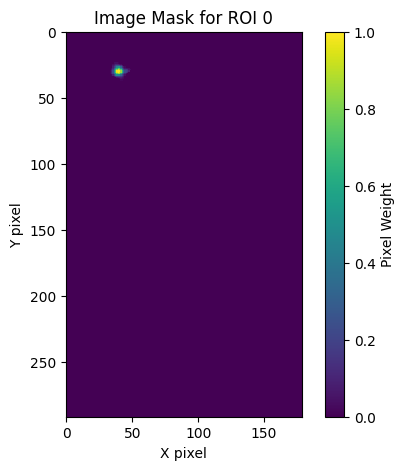

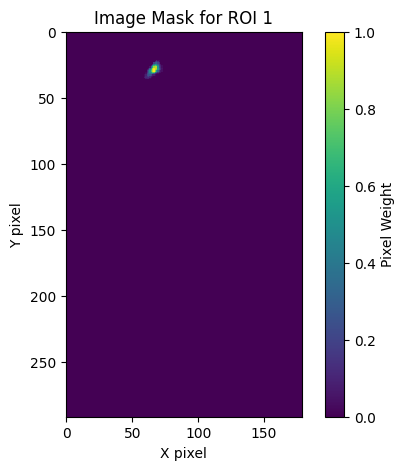

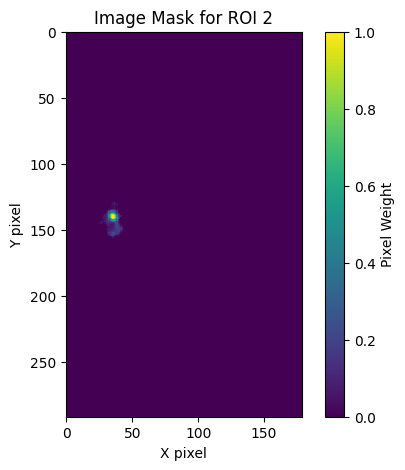

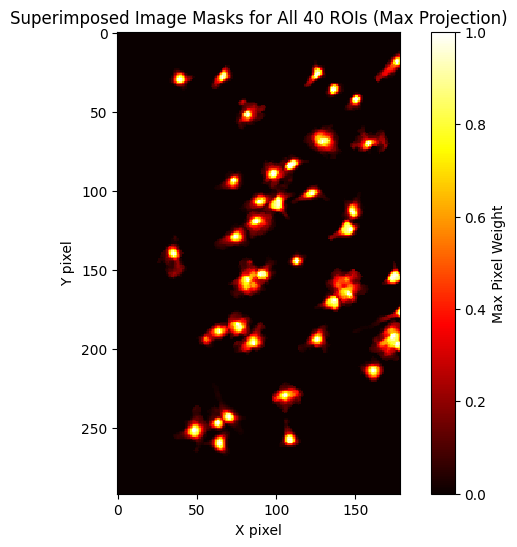

In [5]:
if nwbfile and \
   'ophys' in nwbfile.processing and \
   'ImageSegmentation' in nwbfile.processing['ophys'].data_interfaces:

    image_segmentation_interface = nwbfile.processing['ophys'].get_data_interface('ImageSegmentation')
    # Assuming there's a PlaneSegmentation named 'PlaneSegmentation'
    if 'PlaneSegmentation' in image_segmentation_interface.plane_segmentations:
        plane_segmentation = image_segmentation_interface.get_plane_segmentation('PlaneSegmentation')
        
        image_masks_vector = plane_segmentation['image_mask'] # This is a VectorData
        roi_ids_masks = plane_segmentation.id[:] # Get ROI IDs associated with these masks
        num_rois = len(roi_ids_masks)

        if num_rois > 0:
            # Plot first few individual masks
            num_masks_to_plot_individually = min(3, num_rois)
            
            plt.style.use('default') # Reset style for cleaner image plots

            for i in range(num_masks_to_plot_individually):
                # image_masks_vector is a HDF5 dataset-like object or list of arrays
                # Accessing an element gives the 2D mask for that ROI
                mask_2d = image_masks_vector[i] 
                roi_id_label = roi_ids_masks[i]
                
                plt.figure(figsize=(6, 5))
                plt.imshow(mask_2d, cmap='viridis', interpolation='nearest')
                plt.title(f"Image Mask for ROI {roi_id_label}")
                plt.xlabel("X pixel")
                plt.ylabel("Y pixel")
                plt.colorbar(label="Pixel Weight") # Or Intensity, depending on mask definition
                plt.show()

            # Create and plot a composite image of all masks (max projection)
            # Get shape from the first mask, assuming all are same
            first_mask_shape = image_masks_vector[0].shape
            composite_mask = np.zeros(first_mask_shape, dtype=np.float32) 
            
            for i in range(num_rois):
                mask_2d_current = image_masks_vector[i]
                composite_mask = np.maximum(composite_mask, mask_2d_current)
            
            plt.figure(figsize=(8, 6))
            plt.imshow(composite_mask, cmap='hot', interpolation='nearest')
            plt.title(f"Superimposed Image Masks for All {num_rois} ROIs (Max Projection)")
            plt.xlabel("X pixel")
            plt.ylabel("Y pixel")
            plt.colorbar(label="Max Pixel Weight")
            plt.show()
        else:
            print("No ROIs with image masks found in PlaneSegmentation.")
    else:
        print("PlaneSegmentation not found in ImageSegmentation interface.")
else:
    print("NWB file not loaded or required ophys data (ImageSegmentation/PlaneSegmentation) not found.")

The individual mask plots show the distinct shape of each neuron as identified by the segmentation algorithm. The superimposed plot gives an overview of all detected neurons in the field of view. These spatial footprints are crucial for associating the fluorescence traces with specific cells.

## 5. Summary and Future Directions

This notebook demonstrated the initial steps for accessing and exploring Dandiset 001174. We covered:
- Connecting to DANDI and retrieving Dandiset metadata and asset lists.
- Loading a specific NWB file (`sub-Q/sub-Q_ophys.nwb`) using its API URL.
- Briefly summarizing the NWB file's content, highlighting key data such as raw imaging (`OnePhotonSeries`), ROI fluorescence traces (`RoiResponseSeries`), and ROI spatial footprints (`PlaneSegmentation`).
- Basic visualizations of these data types.

**Potential Future Directions for Analysis:**

1.  **Detailed Event Analysis:** The `EventAmplitude` data was mentioned but not explored. Analyzing the timing, amplitude, and duration of these detected neural events could be a next step.
2.  **Correlation Analysis:** Examine correlations between the activity of different neurons (using their fluorescence traces) to understand functional connectivity.
3.  **Comparison Across Sessions/Subjects:** This Dandiset contains data from multiple subjects and sessions. Extending this analysis to other NWB files would allow for comparisons. The user prompt detailed files for `sub-F` and `sub-Q`.
4.  **Behavioral Correlations:** The Dandiset description mentions a "reaching task." If behavioral data is available and timestamped within the NWB files (e.g., in `nwbfile.trials` or `nwbfile.processing['behavior']`), correlating neural activity with specific behavioral events would be highly valuable. (This specific NWB file `sub-Q/sub-Q_ophys.nwb` is from a "spontaneous condition" session, so it might not contain task-related behavior, but other files might).
5.  **Advanced Visualization:** Create more sophisticated visualizations, such as plotting ROI activity overlaid on the imaging field, or creating activity maps.
6.  **Exploring other data in `OnePhotonSeries`:** While we plotted a single frame, one could compute a mean or max projection image across time to get a clearer view of the field of view if needed.

Researchers are encouraged to adapt the code provided here to delve deeper into the rich dataset provided in Dandiset 001174. Remember to consult the DANDI archive and any associated publications for more context on the experimental design and data collection methods.

---
*End of AI-generated notebook.*

cleanup IO object and remote file if they were opened

In [6]:
# Cleanup: Close the NWBHDF5IO object and the remfile.File object
# This is important to release file handles, especially for remote files.
if io_obj:
    try:
        io_obj.close()
        print("NWBHDF5IO object closed.")
    except Exception as e:
        print(f"Error closing NWBHDF5IO object: {e}")

if remote_f:
    try:
        remote_f.close()
        print("remfile object closed.")
    except Exception as e:
        print(f"Error closing remfile object: {e}")

NWBHDF5IO object closed.
remfile object closed.
